In [130]:
#import libraries 
import re
import string
import pandas as pd
import nltk
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.svm import SVC  # Import SVM
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns




In [117]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv("data.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
print(df.columns)

Index(['label', 'title', 'text', 'subject', 'date'], dtype='object')


Data Preprocessing: Clean the text data by removing noise, special characters, and irrelevant information. You may also perform lowercasing, removing stop words, stemming, or lemmatization

In [119]:
# Apply text preprocessing
df["text"] = df["text"].str.lower()
df["text"] = df["text"].str.replace(r'\d+', '', regex=True)
df["text"] = df["text"].str.translate(str.maketrans('', '', string.punctuation))
df["text"] = df["text"].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

In [120]:
#lemmatization

from nltk.stem import WordNetLemmatizer
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

df["text"] = df["text"].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))


In [121]:
print(df['text'])

0        washington reuters head conservative republica...
1        washington reuters transgender people allowed ...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattlewashington reuters president donald tru...
                               ...                        
39937    left organizing decade george soros funding ch...
39938    monica crowley offer brilliant political analy...
39939    protest underway charlotte thing got completel...
39940    local charlotte nc news station wsoctv reporti...
39941    dividing america obama legacy hillary continue...
Name: text, Length: 39942, dtype: object


In [122]:
#stemming
'''
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Apply stemming
df["text_clean"] = df["text_clean"].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))
'''


'\nfrom nltk.stem import PorterStemmer\nstemmer = PorterStemmer()\n\n# Apply stemming\ndf["text_clean"] = df["text_clean"].apply(lambda text: \' \'.join([stemmer.stem(word) for word in text.split()]))\n'

In [123]:
print(df.columns)

Index(['label', 'title', 'text', 'subject', 'date'], dtype='object')


Tokenization: Split the text into tokens (words or phrases).
Vectorization: Convert the tokens into numerical representations so that the model can process them. Common methods include

In [124]:
# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X_vectors = tfidf_vectorizer.fit_transform(df["text"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectors, df["label"], test_size=0.2, random_state=42)

In [125]:
print(df['text'])

0        washington reuters head conservative republica...
1        washington reuters transgender people allowed ...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattlewashington reuters president donald tru...
                               ...                        
39937    left organizing decade george soros funding ch...
39938    monica crowley offer brilliant political analy...
39939    protest underway charlotte thing got completel...
39940    local charlotte nc news station wsoctv reporti...
39941    dividing america obama legacy hillary continue...
Name: text, Length: 39942, dtype: object


In [126]:
X_train.dtype

dtype('float64')

In [127]:
# Train SVM Model
model = SVC(kernel="linear")  # You can try 'rbf' or 'poly' for different results
model.fit(X_train, y_train)

SVC(kernel='linear')

In [133]:
# Evaluate
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9974


In [134]:
# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9940


In [136]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})

print(metrics_df)

      Metric     Value
0   Accuracy  0.993992
1  Precision  0.993995
2     Recall  0.993992
3   F1 Score  0.993992


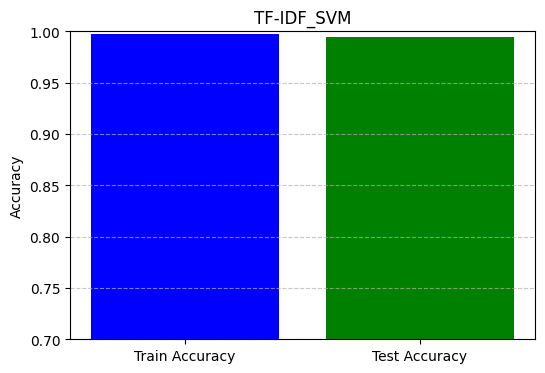

In [137]:


model.fit(X_train, y_train)


train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))


plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("TF-IDF_SVM")
plt.ylim(0.7, 1)  
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

In [27]:
import json

accuracy = 0.99399
with open("accuracy_TF-IDF_SVM.json", "w") as f:
    json.dump({"accuracy": accuracy}, f)

In [109]:

models = ["FastText_LR", "TF-IDF_SVM", "Word2vector_LR", "word2vector_SVM" , "RandomForest" , "Logistic_regression" , "Naïve_Bayes"]

accuracies = [0.9811  , 0.99399 , 0.9683,0.9686 , 0.98 ,0.9939 , 0.96 ]

In [110]:
import os
print(os.listdir())

['accuracy_FastText_LR.json', 'accuracy_Logistic_regression.json', 'accuracy_LR_TF-IDF.json', 'accuracy_Naïve_Bayes.json', 'accuracy_NB_TF-IDF.json', 'accuracy_RandomForest1.json', 'accuracy_RF_TF-IDF.json', 'accuracy_TF-IDF_LR.json', 'accuracy_TF-IDF_SVM.json', 'accuracy_Word2vector_LR.json', 'accuracy_word2vector_SVM.json', 'data.csv', 'FastText_LR.ipynb', 'project 3(v1).ipynb', 'RandomForest.ipynb', 'TF-IDF_LR.ipynb', 'TF-IDF_SVM.ipynb', 'validation_data.csv', 'validation_predictions.csv', 'Word2Vec_LR.ipynb', 'Word2Vec_SVM.ipynb']


In [113]:
import json


model_names = ["FastText_LR", "TF-IDF_SVM", "Word2vector_LR", "Word2vector_SVM" , "RF_TF-IDF" , "LR_TF-IDF","NB_TF-IDF"]


accuracies = []


for model in model_names:
    with open(f"accuracy_{model}.json", "r") as f:
        data = json.load(f)  
        accuracies.append(data["accuracy"])  
print("", accuracies)

 [0.9811, 0.99399, 0.9683, 0.9686, 0.98, 0.9939, 0.96]


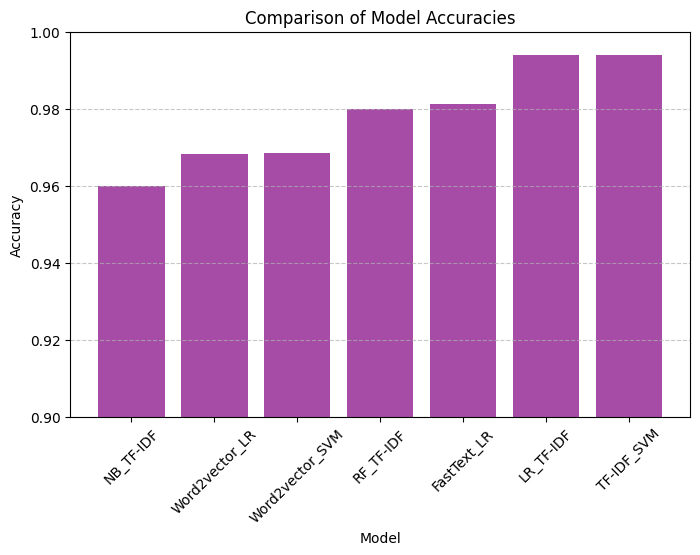

In [114]:
import matplotlib.pyplot as plt

# Sort the data
sorted_indices = np.argsort(accuracies) # Sort by y values (ascending)
model_names_sorted = np.array(model_names)[sorted_indices]
accuracies_sorted = np.array(accuracies)[sorted_indices]
# Now plot barplot, using model_names_sorted and accuracies_sorted as inputs

plt.figure(figsize=(8, 5))  
plt.bar(model_names_sorted, accuracies_sorted, color='purple', alpha=0.7)   


plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.90, 1) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)




plt.show()

In [20]:
# Load dataset
df1 = pd.read_csv("validation_data.csv")

In [21]:
# Apply text preprocessing
df1["text"] = df1["text"].str.lower()
df1["text"] = df1["text"].str.replace(r'\d+', '', regex=True)
df1["text"] = df1["text"].str.translate(str.maketrans('', '', string.punctuation))
df1["text"] = df1["text"].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

In [22]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Apply stemming
df1["text"] = df1["text"].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

In [23]:
# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f":white_check_mark: Accuracy: {accuracy:.4f}")
# Print classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred, target_names=["FAKE", "REAL"]))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()